# Shahafster : Python Data Analysis

### Connectiong To Database

In [42]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji
import html
from datetime import datetime

# -----------------------------------

conn = mysql.connector.connect(user = "root", password = "Sdan3189", host = "localhost", database = "shahafster")
cursor = conn.cursor()

## Create Posts Dataset

In [55]:
sql = "SELECT c.Text, c.Moji, l.Name, c.TimeStamp FROM Comment as c INNER JOIN Label as l ON l.ID = c.Label_ID"
cursor.execute(sql)
posts = pd.DataFrame(columns = ['Text', 'Moji', 'Label', 'Time Stamp'])
for (text, moji, name, timestamp) in cursor:
    row = [[text, moji, name, timestamp]]
    posts = pd.concat([pd.DataFrame(row, columns = posts.columns), posts], ignore_index = True)

In [44]:
posts['Time Stamp'] = posts['Time Stamp'].apply(lambda x: str(x)[0:10])
posts['Time Stamp'] = posts['Time Stamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

### Graph: Emoji Use Over Time

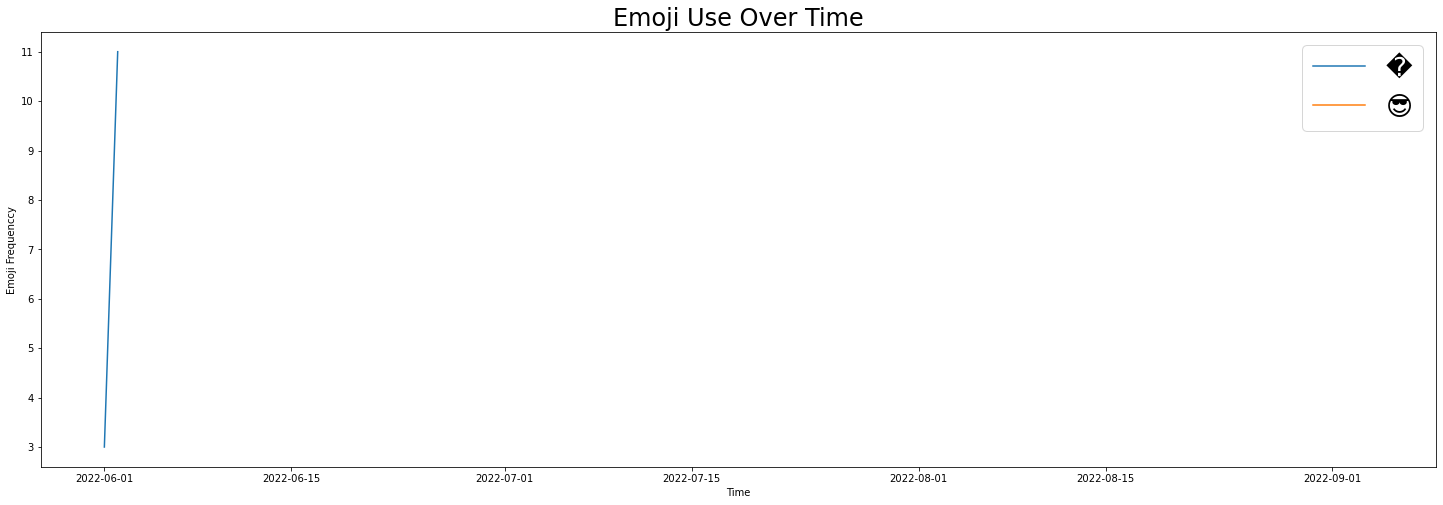

In [54]:
plt.figure(figsize = (25, 8))
mojis = list(set(posts['Moji']))
for moji in mojis:
    ds = posts[posts['Moji'] == moji]
    ds = ds[['Time Stamp']]
    vc = ds['Time Stamp'].value_counts()
    plt.plot(vc.index, vc, label = html.unescape('&#'+str(moji)))

plt.title("Emoji Use Over Time", fontsize = 24)
plt.xlabel("Time")
plt.ylabel("Emoji Frequenccy")
plt.legend(loc = 0, frameon = 'legend_drawn_flag', prop={'size': 26})
plt.show()